<a href="https://colab.research.google.com/github/Anushree-B/Lie-detector/blob/main/Lie_detector_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv("Data/politifact_updated.csv")

In [81]:
df.head()

,Politician,Quote,Image URL,char_count,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities,named_entities_count
0,Melissa Agard,potato chips kitkat bars and viagra are not t...,true,102,16,5.312500,12.0,12.0,12.0,12.0,12.0,0.0000,"('wisconsin', 'GPE')",1
1,Melissa Agard,since the state senate has only rejected...,true,123,19,5.157895,15.0,15.0,15.0,15.0,15.0,-0.4588,"('the state senate', 'ORG'), ('five', 'CARDINA...",4
2,Instagram posts,lego donates model mri kits to hospitals to he...,true,107,17,5.352941,12.0,12.0,12.0,12.0,12.0,0.2500,NaN,0
3,Brian Krassenstein,it has been u s policy for at least years...,true,135,25,4.200000,17.0,17.0,17.0,17.0,17.0,0.2263,"('at least years', 'DATE'), ('americans', '...",2
4,Mike Oliverio,a few years back mitchell stadium in bluefie...,true,114,20,4.450000,18.0,18.0,18.0,18.0,18.0,0.6369,"('a few years', 'DATE'), ('america', 'GPE')",2


In [82]:
df.shape

(14400, 14)

# Data preprocessing and cleaning

The target variable currently is Imahe URL, consisting of 6 truth values, converting that variable to Truth value having only 3 truth values

In [83]:
df['Image URL'] = df['Image URL'].map({"TRUE" : 1, "mostly-true" : 1, "half-true" : 2, "barely-true" :3, "FALSE": 3 , "pants-fire": 3})

In [84]:
df_new = df.copy()
# Apply the mapping to the 'truth_value' column
df['Truth value'] = df['Image URL']
df = df[df['Truth value'].notnull()]

Dropping unnecessary columns

In [85]:
df.drop(['char_count','Image URL'], axis = 1,inplace=True)

In [86]:
# politicians_to_drop = ['Facebook posts','Viral image','Instagram posts','Bloggers','X posts','TikTok posts','Social Media']
# df = df[~df['Politician'].isin(politicians_to_drop)]

In [87]:
politicians_to_keep = df['Politician'].value_counts()[df['Politician'].value_counts() > 150].index.tolist()
df = df[df['Politician'].isin(politicians_to_keep)]

In [88]:
df.shape

(3108, 13)

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Politician'] = le.fit_transform(df['Politician'])

In [90]:
df.head()

,Politician,Quote,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities,named_entities_count,Truth value
2370,5,says that under his presidency the unemployme...,20,5.050000,13.0,13.0,13.0,13.0,13.0,-0.4404,"('american', 'NORP')",1,1.0
2373,5,in the u s a person can be married in the m...,24,3.666667,16.0,16.0,16.0,16.0,16.0,0.0000,"('afternoon', 'TIME')",1,1.0
2382,2,texas republicans just voted to give a republi...,24,5.416667,21.0,21.0,21.0,21.0,21.0,-0.2500,"('texas', 'GPE'), ('republicans', 'NORP'), ('r...",3,1.0
2389,4,the uk has had zero school shootings since it...,17,4.352941,12.0,12.0,12.0,12.0,12.0,-0.3400,"('uk', 'GPE'), ('zero', 'CARDINAL')",2,1.0
2393,5,we cut black child poverty in half in bec...,14,4.000000,9.0,9.0,9.0,9.0,9.0,-0.4215,"('half', 'CARDINAL')",1,1.0


Checking outliers and removing them if necessary

<Axes: >

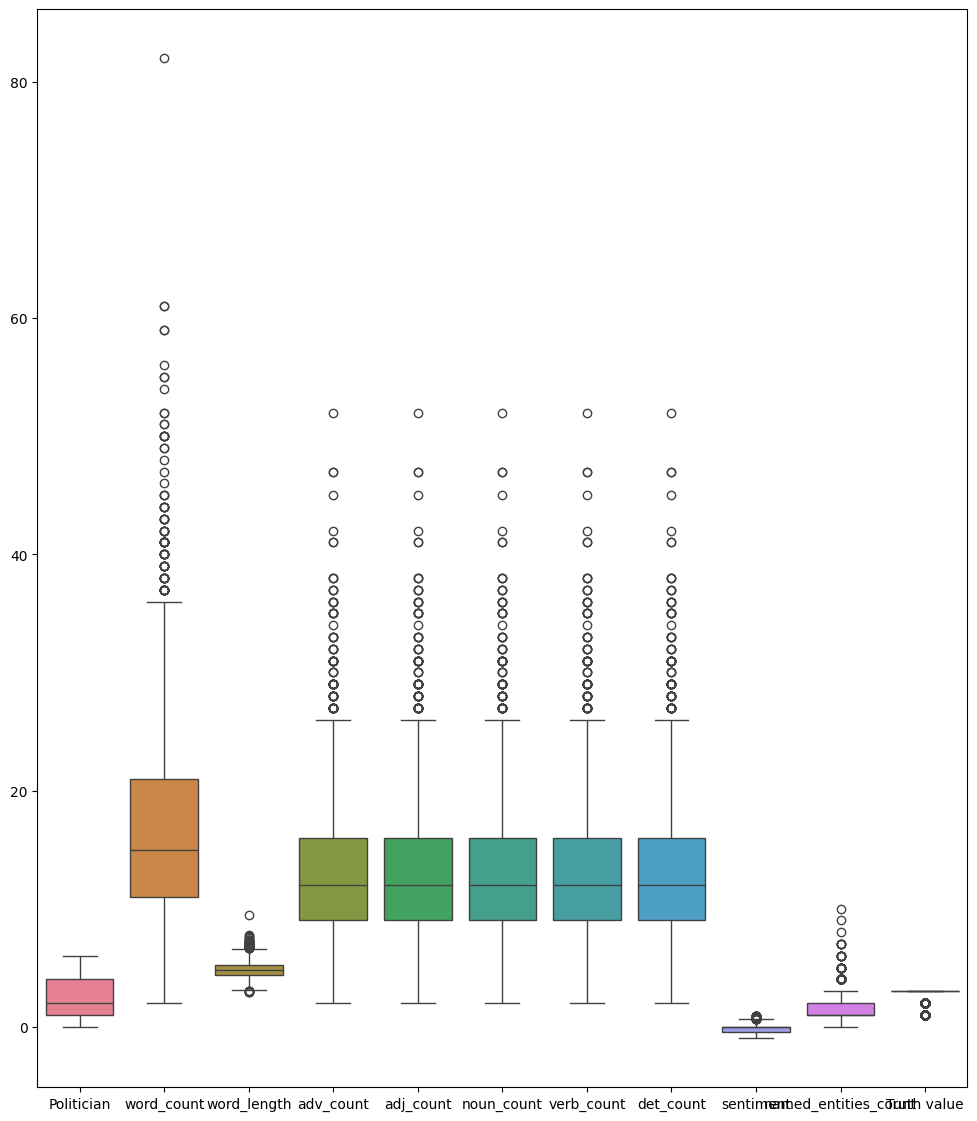

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,14))
sns.boxplot(df, ax = ax)

In [92]:
df['Truth value'].value_counts()

Truth value
3.0    2405
2.0     410
1.0     293
Name: count, dtype: int64

In [93]:
x = df.drop(['Truth value'], axis=1)
y = df['Truth value']

In [94]:
x.head()

,Politician,Quote,word_count,word_length,adv_count,adj_count,noun_count,verb_count,det_count,sentiment,named_entities,named_entities_count
2370,5,says that under his presidency the unemployme...,20,5.050000,13.0,13.0,13.0,13.0,13.0,-0.4404,"('american', 'NORP')",1
2373,5,in the u s a person can be married in the m...,24,3.666667,16.0,16.0,16.0,16.0,16.0,0.0000,"('afternoon', 'TIME')",1
2382,2,texas republicans just voted to give a republi...,24,5.416667,21.0,21.0,21.0,21.0,21.0,-0.2500,"('texas', 'GPE'), ('republicans', 'NORP'), ('r...",3
2389,4,the uk has had zero school shootings since it...,17,4.352941,12.0,12.0,12.0,12.0,12.0,-0.3400,"('uk', 'GPE'), ('zero', 'CARDINAL')",2
2393,5,we cut black child poverty in half in bec...,14,4.000000,9.0,9.0,9.0,9.0,9.0,-0.4215,"('half', 'CARDINAL')",1


In [95]:
y.head()

2370    1.0
2373    1.0
2382    1.0
2389    1.0
2393    1.0
Name: Truth value, dtype: float64

In [96]:
df.to_csv("Data/politifact_cleaned.csv",index=False)